### **Support Vector Classifier Implementation**

<Axes: xlabel='0', ylabel='1'>

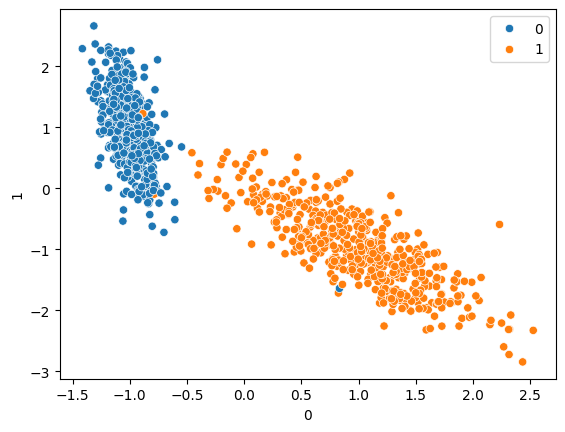

In [36]:
## No overlapping

import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
## Let us create a synthetic data points
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)
sb.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1], hue=y)

In [37]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)
svc.fit(x_train,y_train)
### Prediction
y_pred=svc.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report

def print_reports(y_true, y_predict):
    cr=classification_report(y_true, y_predict)
    print("Classification Report : ")
    print(cr)
    cm=confusion_matrix(y_true, y_predict)
    print("Confusion Matrix : ")
    print(cm)


print_reports(y_test,y_pred)

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.99      0.99      0.99       126

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

Confusion Matrix : 
[[123   1]
 [  1 125]]


<Axes: xlabel='0', ylabel='1'>

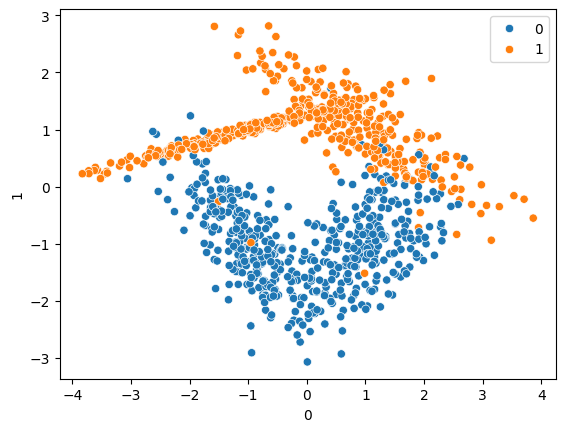

In [38]:
## With overlapping
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
## Let us create a synthetic data points
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)
sb.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1], hue=y)

In [39]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)
svc.fit(x_train,y_train)
### Prediction
y_pred=svc.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report

def print_reports(y_true, y_predict):
    cr=classification_report(y_true, y_predict)
    print("Classification Report : ")
    print(cr)
    cm=confusion_matrix(y_true, y_predict)
    print("Confusion Matrix : ")
    print(cm)


print_reports(y_test,y_pred)

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       127
           1       0.94      0.94      0.94       123

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

Confusion Matrix : 
[[119   8]
 [  7 116]]


## **Implementing RBF Kernel**

In [40]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_pred_rbf=rbf.predict(x_test)

def print_reports(y_true, y_predict):
    from sklearn.metrics import confusion_matrix,classification_report
    cr=classification_report(y_true, y_predict)
    print("Classification Report : ")
    print(cr)
    cm=confusion_matrix(y_true, y_predict)
    print("Confusion Matrix : ")
    print(cm)


print_reports(y_test,y_pred_rbf)

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       127
           1       0.92      0.99      0.96       123

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

Confusion Matrix : 
[[117  10]
 [  1 122]]


## **Implementing Polynomial Kernel**

In [41]:
poly=SVC(kernel='poly')
poly.fit(x_train,y_train)
y_pred_poly=poly.predict(x_test)

def print_reports(y_true, y_predict):
    from sklearn.metrics import confusion_matrix,classification_report
    cr=classification_report(y_true, y_predict)
    print("Classification Report : ")
    print(cr)
    cm=confusion_matrix(y_true, y_predict)
    print("Confusion Matrix : ")
    print(cm)


print_reports(y_test,y_pred_poly)

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       127
           1       0.94      0.95      0.95       123

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

Confusion Matrix : 
[[120   7]
 [  6 117]]


## **Implementing Sigmoid Kernel** 

In [42]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(x_train,y_train)
y_pred_sigmoid=sigmoid.predict(x_test)

def print_reports(y_true, y_predict):
    from sklearn.metrics import confusion_matrix,classification_report
    cr=classification_report(y_true, y_predict)
    print("Classification Report : ")
    print(cr)
    cm=confusion_matrix(y_true, y_predict)
    print("Confusion Matrix : ")
    print(cm)


print_reports(y_test,y_pred_sigmoid)

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       127
           1       0.90      0.91      0.90       123

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

Confusion Matrix : 
[[114  13]
 [ 11 112]]


## **Hyper parametric tunning using GridSearchCV**

In [45]:
from sklearn.model_selection import GridSearchCV

## Defining parametric range
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['kbf','poly','linear']}

gridcv=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
gridcv.fit(x_train,y_train)

gridcv.best_params_

# y_test_grid=gridcv.transform(x_test)



Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ..........C=0.1, gamma=1, kernel=kbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.1, gamma=1, kernel=kbf;, score=nan total time=   0.0s
[CV 3/5] END ..........C=0.1, gamma=1, kernel=kbf;, score=nan total time=   0.0s
[CV 4/5] END ..........C=0.1, gamma=1, kernel=kbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0.1, gamma=1, kernel=kbf;, score=nan total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.927 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.967 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.967 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.947 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\PythonBasic\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\PythonBasic\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\PythonBasic\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\saakh\Learning\AI_ML\Data_Analyst_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [47]:
y_test_gridcv=gridcv.predict(x_test);

def print_reports(y_true, y_predict):
    from sklearn.metrics import confusion_matrix,classification_report
    cr=classification_report(y_true, y_predict)
    print("Classification Report : ")
    print(cr)
    cm=confusion_matrix(y_true, y_predict)
    print("Confusion Matrix : ")
    print(cm)


print_reports(y_test,y_test_gridcv)

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       127
           1       0.95      0.93      0.94       123

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

Confusion Matrix : 
[[121   6]
 [  8 115]]
